#### Libraries

In [2]:
import sys
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import importlib
import yfinance as yf
import datapackage
import time
import webbrowser


from IPython.display import Markdown
def printmd(string):
    display(Markdown(string))

    
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 1000)


In [3]:
import inspect
lines = inspect.getsource(go.Figure.update_layout)
print(lines)

    def update_layout(self, dict1=None, overwrite=False, **kwargs):
        """
        Update the properties of the figure's layout with a dict and/or with
        keyword arguments.

        This recursively updates the structure of the original
        layout with the values in the input dict / keyword arguments.

        Parameters
        ----------
        dict1 : dict
            Dictionary of properties to be updated
        overwrite: bool
            If True, overwrite existing properties. If False, apply updates
            to existing properties recursively, preserving existing
            properties that are not specified in the update operation.
        kwargs :
            Keyword/value pair of properties to be updated

        Returns
        -------
        BaseFigure
            The Figure object that the update_layout method was called on
        """
        self.layout.update(dict1, overwrite=overwrite, **kwargs)
        return self



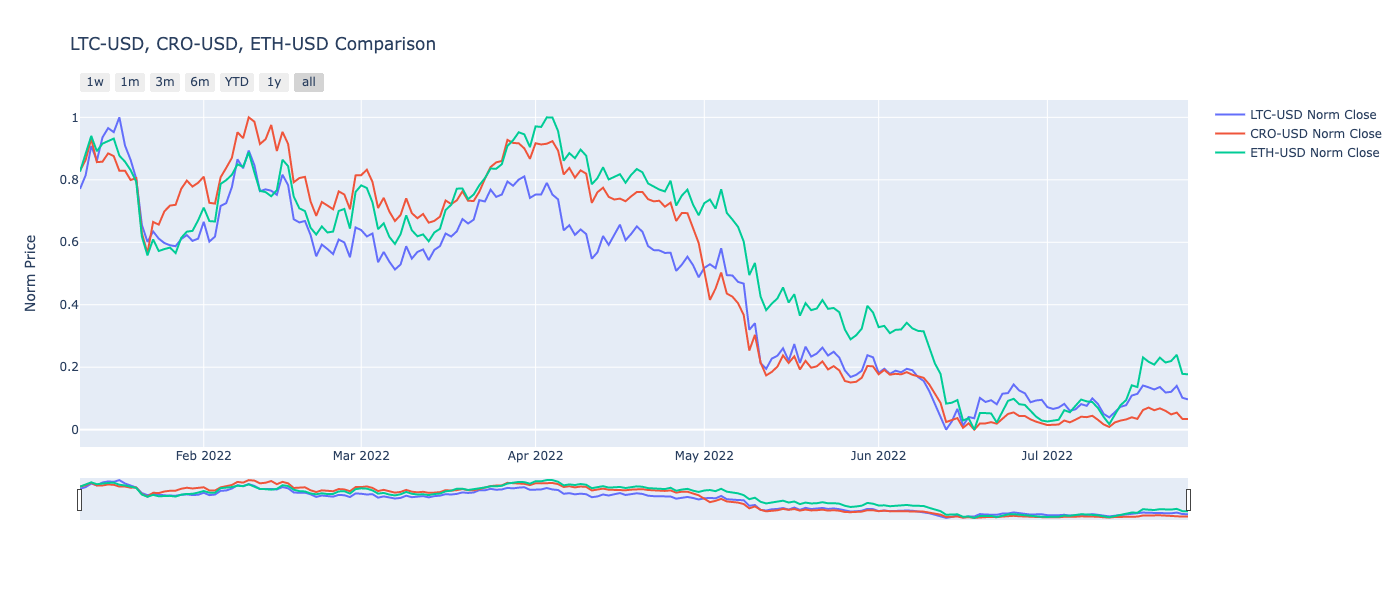

Given Timeframe:

LTC-USD Return: -57.59%

CRO-USD Return: -72.94%

ETH-USD Return: -53.24%

Last 90 Days Close Pearson Correlation Matrix: 

,LTC-USD,CRO-USD,ETH-USD
LTC-USD,1.000000,0.963071,0.960145
CRO-USD,0.963071,1.000000,0.956059
ETH-USD,0.960145,0.956059,1.000000


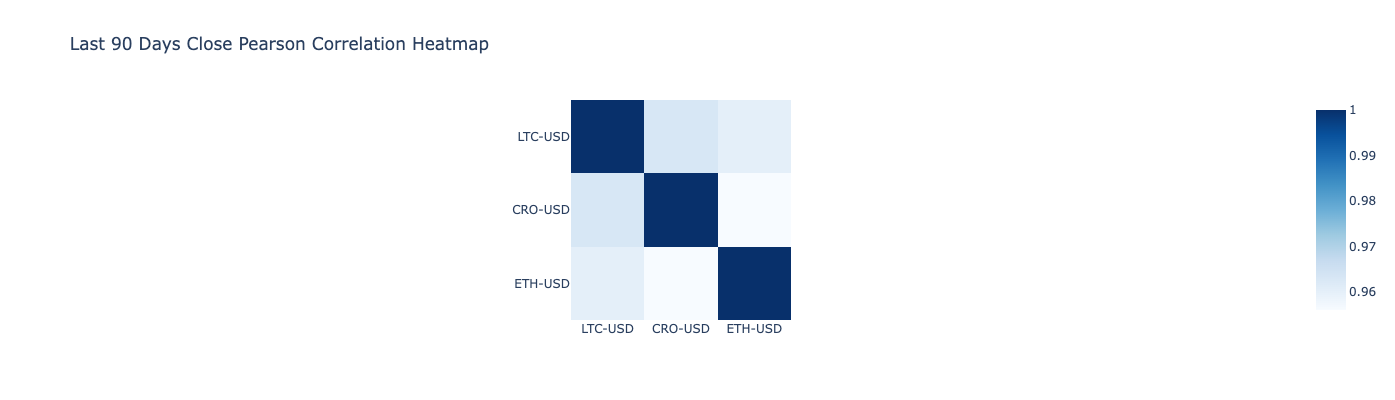

In [94]:
tg.compare_charts(['LTC-USD', 'CRO-USD', 'ETH-USD'], start = '2022-01-10', end = '2022-12-31')

# Stocks trade history

#### Examine stock trades

In [ ]:
stocks.examine_trades()
stocks.add_price_diff()


Total runtime:  0.06 s
- AABA: No data found, symbol may be delisted
- WORK: No data found, symbol may be delisted
- IPOE: No data found, symbol may be delisted
- APTI: No data found for this date range, symbol may be delisted
- MZOR: No data found for this date range, symbol may be delisted

Total runtime:  14.32 s


### Options trade history

In [30]:
r.export.export_completed_option_orders(dir_path = '.', file_name = 'My_option_orders.csv')
options = pd.read_csv('My_option_orders.csv')
options['order_created_at'] = options['order_created_at'].replace('T(.*)', '', regex=True)
options['order_created_at'] = pd.to_datetime(options['order_created_at'], format = '%Y-%m-%d')
options['expiration_date'] = pd.to_datetime(options['expiration_date'], format = '%Y-%m-%d')
options = options.iloc[::-1].reset_index(drop=True)

#correcting GME order glitch for one contract @ 20.5 strike
insert_order = pd.DataFrame(options.iloc[34].copy()).T
insert_order['price'], insert_order['processed_quantity'] = 0.09, 1

options1 = options.iloc[0:35]
options2 = options.iloc[35:]

option_orders = pd.concat([options1, insert_order, options2]).reset_index(drop=True)

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...


#### Examine option trades

In [68]:
options = et.Options(option_orders)

options.examine_trades()

In [71]:
options.trades_df.head(10)

,Side,Symbol,Option Type,Strategy,Expiration,Strike,Date,Quantity,Avg_Price,Cur_Avg_Cost,Cur Quantity,Total,Gain,% Gain,Expired,Net Gain/Loss
0,buy,WORK,call,long_call,2020-07-17,48.0,2020-06-09,1.0,0.20,0.20,1.0,20.0,0.0,0,,0.0
1,buy,MA,call,long_call,2020-07-10,332.5,2020-06-11,1.0,2.52,2.52,1.0,252.0,0.0,0,,0.0
2,buy,SOXL,call,long_call,2020-07-17,260.0,2020-06-11,1.0,2.00,2.00,1.0,200.0,0.0,0,,0.0
3,buy,UVXY,put,long_put,2020-06-26,31.5,2020-06-12,1.0,2.20,2.20,1.0,220.0,0.0,0,,0.0
4,buy,WB,put,long_put,2020-07-31,29.0,2020-06-15,1.0,0.95,0.95,1.0,95.0,0.0,0,,0.0
5,buy,DIS,call,long_call,2020-07-24,165.0,2020-06-19,4.0,0.12,0.12,4.0,48.0,0.0,0,,0.0
6,buy,DAL,call,long_call,2020-08-21,55.0,2020-06-19,2.0,0.33,0.33,2.0,66.0,0.0,0,,0.0
7,sell,SOXL,call,long_call,2020-07-17,260.0,2020-06-22,1.0,2.40,2.00,0.0,240.0,40.0,20.0%,,40.0
8,sell,UVXY,put,long_put,2020-06-26,31.5,2020-06-25,1.0,0.24,2.20,0.0,24.0,-196.0,-89.09%,,-156.0
9,buy,AA,put,long_put,2020-07-31,11.0,2020-07-02,1.0,0.94,0.94,1.0,94.0,0.0,0,,-156.0


#### Crypto trade history

In [80]:
#get all crypto orders
crypto_orders = pd.DataFrame(r.orders.get_all_crypto_orders(info=None))[['average_price', 'created_at', 'cumulative_quantity', 'currency_pair_id', 'rounded_executed_notional', 'side', 'state', 'type']]
crypto_orders.columns = ['average_price', 'date', 'quantity', 'currency_pair_id', 'total', 'side', 'state', 'type']
crypto_orders = crypto_orders[crypto_orders['state'] != 'canceled']

crypto_orders['date'] = crypto_orders['date'].replace('T(.*)', '', regex=True)
crypto_orders['date'] = pd.to_datetime(crypto_orders['date'], format = '%Y-%m-%d')
crypto_orders['average_price'] = crypto_orders['average_price'].astype(float)
crypto_orders['quantity'] = crypto_orders['quantity'].astype(float)
crypto_orders['total'] = crypto_orders['total'].astype(float)

currencies_info = pd.DataFrame(r.markets.get_currency_pairs(info='asset_currency'))[['code', 'id', 'name', 'type']]
currency_pair_ids = pd.DataFrame(r.markets.get_currency_pairs(info='id')).rename(columns = {0: 'currency_pair_id'})
currencies_info = pd.concat([currencies_info, currency_pair_ids], axis=1)
currencies_info = currencies_info[['code', 'currency_pair_id']].rename(columns = {'code':'symbol'})

crypto_orders = crypto_orders.merge(currencies_info, how = 'left', on = 'currency_pair_id')

crypto_orders = crypto_orders.iloc[::-1].dropna(subset = ['average_price']).reset_index(drop=True)


crypto_buyorders, crypto_sellorders = crypto_orders[crypto_orders['side'] == 'buy'], crypto_orders[crypto_orders['side'] == 'sell']

Found Additional pages.
Loading page 2 ...


#### Examine crypto trades

In [82]:
crypto = et.StocksCrypto(crypto_orders, crypto = 'yes')
crypto.examine_trades()
# crypto.add_price_diff()  

In [22]:
crypto.gains_df

,Side,Symbol,Date,Quantity,Avg_Price,Cur Quantity,Cur_Avg_Cost,Total,Gain,% Gain,Net Gain/Loss,Free/Acquired Stock
0,sell,ETH,2021-01-10,16.71,1216.41,0.00,1023.89,20327.87,3217.36,18.8%,3219.27,
1,sell,LTC,2021-05-04,7.56,335.00,0.00,202.64,2531.57,1000.29,65.32%,4705.15,
2,sell,ETH,2021-01-30,2.00,1369.11,0.00,1231.11,2738.21,276.00,11.21%,3608.98,
3,sell,ETH,2021-01-29,1.00,1357.52,2.05,1231.11,1357.52,126.41,10.27%,3325.74,
4,sell,DOGE,2021-05-04,365.00,0.55,0.00,0.27,202.45,102.75,103.05%,3704.86,
5,sell,DOGE,2021-01-29,15470.00,0.08,0.00,0.07,1160.76,76.10,7.02%,3199.33,
6,sell,ETH,2021-01-29,0.05,1369.08,2.00,1231.11,71.87,7.24,11.21%,3332.98,
7,sell,ETH,2021-01-26,0.08,1317.97,3.05,1231.11,99.95,6.59,7.06%,3123.23,
8,sell,ETH,2021-01-11,1.00,1103.00,0.00,1100.85,1103.00,2.15,0.2%,3221.42,
9,sell,DOGE,2021-02-26,2187.00,0.06,0.00,0.05,120.94,1.24,1.04%,3602.11,


### Total Gain/Loss

In [36]:

total_gain = round(stocks.total_gain + crypto.total_gain + options.total_optionsgain, 2)
total_loss = round(stocks.total_loss + crypto.total_loss + options.total_optionsloss, 2)
net_gain_loss = round(total_gain + total_loss,2)

print(f'Total stock gain, loss: $ {round(stocks.total_gain,2)}, $ {round(stocks.total_loss,2)}')
print(f'Total crypto gain, loss: $ {round(crypto.total_gain,2)}, $ {round(crypto.total_loss,2)}')
print(f'Total option gain, loss: $ {round(options.total_optionsgain,2)}, $ {round(options.total_optionsloss,2)}')
print(f'Total gain: $ {total_gain}')
print(f'Total loss: $ {total_loss}')
print(f'Net Gain/Loss: $ {net_gain_loss}')
print()

Total stock gain, loss: $ 27749.08, $ -9661.97
Total crypto gain, loss: $ 3819.15, $ -114.29
Total option gain, loss: $ 9434.0, $ -14606.0
Total gain: $ 41002.23
Total loss: $ -24382.26
Net Gain/Loss: $ 16619.97

